# Part B: Build a wine quality prediction model using K-NN
## Determine efficacy of PCA

In [5]:
# Imports....the usual suspects
import postgresql
import pandas
import sklearn
import matplotlib
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor

from sklearn.decomposition import PCA


## 1. Download the Wine Quality Dataset from the UCI
http://archive.ics.uci.edu/ml/datasets/Wine+Quality
Look for the 'Data Folder' link near top

In [22]:
# X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=1)
df = pandas.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', delimiter=';')
df.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [25]:
# Apply our encoding magic!
for column in df.columns:
    if df[column].dtype == type(object):
        le = sklearn.preprocessing.LabelEncoder()
        df[column] = le.fit_transform(df[column])
        
x_df = df.drop(columns=['quality'])
y_df = df['quality']

## 2. Split the Red Wine Dataset into training and testing

In [26]:
x_train, x_test, y_train, y_test = train_test_split(x_df, y_df)


## 3. Build a K-NN Regression Model to predict the continuous quality variable in the Red Wine Dataset.  Predict for your test set (you're estimating quality column)

Hint, you may want to drop the last element of your test set if it's a giant array: red_y_test[:-1]

In [27]:
# 1 Neighbor, no preprocessing

from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=1)
clf.fit(x_train, y_train)
print('Accuracy: {:.2f}'.format(clf.score(x_test, y_test)))

Accuracy: 0.58


## 4. What is the mean of the differences between the Y actuals (quality column) and your rounded predictions?

In [28]:
y_actual = pandas.DataFrame(y_test)
y_actual['prediction'] = clf.predict(x_test)
y_actual['pred_rounded'] = y_actual['prediction'].round().astype(int)
y_actual['error'] = y_actual['pred_rounded'] - y_actual['quality']
y_actual.head()

,quality,prediction,pred_rounded,error
1567,5,5,5,0
1545,6,7,7,1
746,6,5,5,-1
1174,6,6,6,0
1083,6,5,5,-1


In [30]:
y_actual['error'].abs().mean()


0.535

## 5. Repeat steps 2-5 after applying PCA to the data. 

In [31]:
pca = PCA(n_components=2)
pca.fit(x_train)

PCA(n_components=2)

In [32]:
x_pca = pca.transform(x_train)
x_pca_test = pca.transform(x_test)

In [33]:
print("Original shape: {}".format(str(x_train.shape)))
print("Reduced shape: {}".format(str(x_pca.shape)))

Original shape: (1199, 11)
Reduced shape: (1199, 2)


In [34]:
x_train, x_test, y_train, y_test = train_test_split(x_df, y_df)


In [35]:
# 1 Neighbor, no preprocessing

from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=1)
clf.fit(x_train, y_train)
print('Accuracy: {:.2f}'.format(clf.score(x_test, y_test)))

Accuracy: 0.55


In [18]:
y_actual = pandas.DataFrame(y_test)
y_actual['prediction'] = clf.predict(x_test)
y_actual['pred_rounded'] = y_actual['prediction'].round().astype(int)
y_actual['error'] = y_actual['pred_rounded'] - y_actual['quality']
y_actual.head()

,quality,prediction,pred_rounded,error
83,5,5,5,0
830,4,3,3,-1
271,6,6,6,0
263,5,6,6,1
21,5,6,6,1


In [36]:
y_actual['error'].abs().mean()


0.535

## 6. Did PCA help accuracy?

In [ ]:
#In this example NOT

## 1. Import IRIS dataset

In [34]:
from sklearn import datasets
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans

In [33]:
df = pd.read_csv(r'C:\Users\khalil\ML Lab 4\Iris.csv')
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [6]:
# Apply our encoding magic!
for column in df.columns:
    if df[column].dtype == type(object):
        le = sklearn.preprocessing.LabelEncoder()
        df[column] = le.fit_transform(df[column])
        
x_df = df.drop(columns=['Species'])
y_df = df['Species']
x_train, x_test, y_train, y_test = train_test_split(x_df, y_df)
      

## 2. Plot sepal width vs sepal length

C:\Users\khalil\anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\khalil\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\khalil\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\khalil\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distp

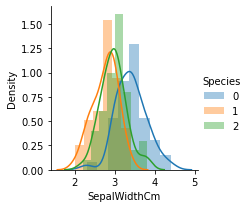

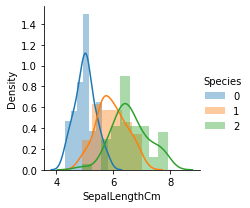

In [19]:
sns.FacetGrid(df,hue="Species",size=3).map(sns.distplot,"SepalWidthCm").add_legend()
sns.FacetGrid(df,hue="Species",size=3).map(sns.distplot,"SepalLengthCm").add_legend()
plt.show()

## 3. Create a KMeans Clustering model and fit to IRIS data

In [20]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x_train)


## 4. What are resulting the cluster centers ?

In [24]:
centers = np.array(kmeans_model.cluster_centers_)
print(kmeans_model.cluster_centers_)


[[126.35294118   6.58529412   2.96764706   5.53823529   1.98823529]
 [ 77.06976744   5.95581395   2.77674419   4.3255814    1.35581395]
 [ 24.28571429   4.97714286   3.4          1.46857143   0.24285714]]


## 5. Plot the clustered data.

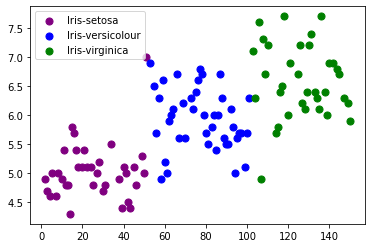

In [32]:
y_kmeans = kmeans.fit_predict(x_train)
# solution, convert the dataframe to a np.array
#Visualizing the clusters for k=4
x_train = np.array(x_train) #that all
plt.scatter(x_train[y_kmeans==0,0],x_train[y_kmeans==0,1],s=50, c='purple',label='Iris-setosa')
plt.scatter(x_train[y_kmeans==1,0],x_train[y_kmeans==1,1],s=50, c='blue',label='Iris-versicolour')
plt.scatter(x_train[y_kmeans==2,0],x_train[y_kmeans==2,1],s=50, c='green',label='Iris-virginica')

plt.legend()